# ヒストグラム その2: ヒストグラム平坦化
## 目的
このチュートリアルでは
*  ヒストグラム平坦化の概念を学び，画像のコントラストを上げるために使ってみる．

## 理論
画素値が特定の範囲に集中している画像を考えてみよう．例えば明るい画像は画素値が高い範囲に集中している．しかし，良い画像とは、画素値が全範囲に万遍なく分布しているものである．良い画像を得るにはこのヒストグラムを両側に向けて伸ばす必要があり，これがまさにヒストグラム平坦化の処理になる．この処理によって画像のコントラストが改善される．
![](http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/_images/histogram_equalization.png)

詳細な説明に関しては，[Wikipediaの ヒストグラム平坦化](http://en.wikipedia.org/wiki/Histogram_equalization) に関する記事を読むことをお勧めする．例を示しながら詳しく説明してあるので，よくわかるであろう．ここでは代わりに，Numpyを使った実装を紹介し，次にOpenCVの関数を紹介する: ([画像](http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/Notebook/wiki.jpg))

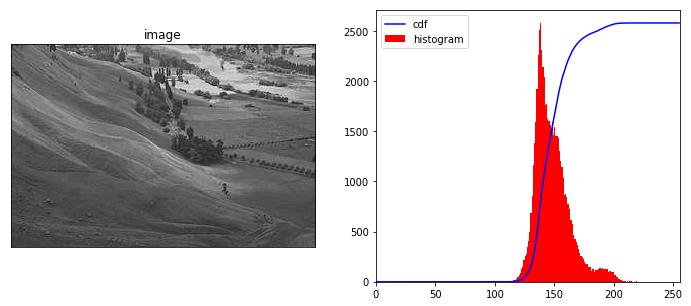

In [3]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('wiki.jpg',0)

hist,bins = np.histogram(img.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.figure(figsize=(12,5))
plt.subplot(1,2,1),plt.imshow(img,cmap='gray')
plt.xticks([]),plt.yticks([]),plt.title('image')
plt.subplot(1,2,2),plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

ヒストグラムが明るい領域に集中していることが分かる．そこで、原画像で明るい領域に集中している画素を全範囲に分布させるために変換関数が必要である．これがヒストグラム平坦化が行う処理である．

まずヒストグラムの最小値(0ではない)を見つけ，wikipediaのページに書いてあるヒストグラム平坦化の式を適用する．ここでNumpyのマスクした配列の概念を使いる．マスクした配列に対しては，処理はすべてマスクされていない要素にだけ作用する．詳しくはNumpyのドキュメント [マスクした配列(masked arrays)](https://docs.scipy.org/doc/numpy/reference/maskedarray.baseclass.html#the-maskedarray-class)を参照せよ．



In [4]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

出力画像を得るための参照テーブルが求められた．参照テーブルを使った画素値の変換は次のようになる．

In [5]:
img2 = cdf[img]

結果の画像、そのヒストグラム，結果画像の画素値の累積分布関数は次のようになる : 

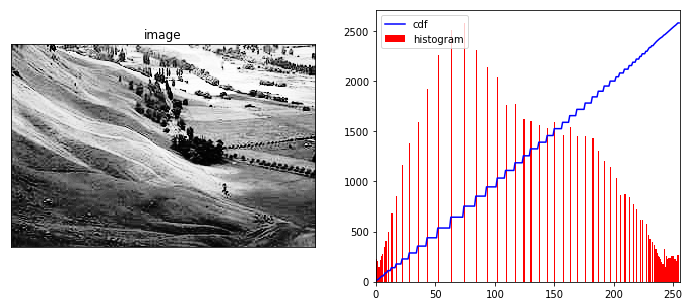

In [7]:
# 上のコード
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('wiki.jpg',0)

hist,bins = np.histogram(img.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

img2 = cdf[img]

hist,bins = np.histogram(img2.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.figure(figsize=(12,5))
plt.subplot(1,2,1),plt.imshow(img2,cmap='gray')
plt.xticks([]),plt.yticks([]),plt.title('image')
plt.subplot(1,2,2),plt.plot(cdf_normalized, color = 'b')
plt.hist(img2.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

もう一つの重要な特徴に，もしも入力画像が例に使用した明るい画像ではなく全体的に暗い画像だったとしても，ヒストグラム平坦化によって得られる結果はほとんど同じような画像になることがある．結果として全ての画像を同じような光源環境で撮影した画像へ変換する “参照ツール” とも言える．これは様々なケースで役に立る．例えば，顔認識を行う際に，顔画像データベースを使った学習を行う前に全データに対してヒストグラム平坦化を行い光源環境を揃えることができる．

## OpenCVを使ったヒストグラム平坦化
OpenCVはヒストグラム平坦化を使うための [cv2.equalizeHist()](http://docs.opencv.org/3.0-beta/modules/imgproc/doc/histograms.html?highlight=cv2.calchist#equalizehist)関数を用意している．これはグレースケール画像を入力とし，ヒストグラム平坦化された画像を出力する．

同じ画像に対して `cv2.equalizeHist()`を適用した結果を示する :

In [8]:
img = cv2.imread('wiki.jpg',0)
equ = cv2.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
cv2.imwrite('res.png',res)

True

![](http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/_images/equalization_opencv.jpg)

これでいろいろな光源環境で撮られた画像に対して，コントラストを向上させ，その結果を確認できるようになった．

ヒストグラム平坦化はヒストグラムが特定の範囲に集中している時に効果を発揮する．その一方で，ヒストグラムが広範囲に分布しているような画像に対してはうまく機能しないことに注意しよう．補足資料に載せたStackOverflowのページを参照してください．

## CLAHE (Contrast Limited Adaptive Histogram Equalization)
最初に紹介したヒストグラム平坦化は画像全体のコントラストを考慮した処理である．多くの場合に、このアイディアはあまり上手くいかない．例えば、次に示す画像は入力画像とヒストグラム平坦化の結果の画像である．

![](http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/_images/clahe_1.jpg)

背景領域のコントラストは向上したものの，胸像の顔を見ると過度に明るくなってしまったため、細部情報が失われている．これは，入力画像のヒストグラムが特定の範囲に偏っていないことが原因である(入力画像のヒストグラムをプロットしてみよ)．

この問題を解決するためには 適応的ヒストグラム平坦化 をしなければならない．この処理は，画像を “タイル(tiles)” (OpenCVのデフォルトでは8x8)と呼ばれる小領域に分割し，領域毎にヒストグラム平坦化を適用するものである．(ノイズが無ければ)小領域中ではヒストグラムが小さい範囲に集中すると仮定している．ノイズがある場合，ノイズが強調されてしまうことがある．これを防ぐために コントラストの制限 を適用する．もしもビンの出現頻度が特定の上限値(OpenCVのデフォルトでは40)を超えた場合，上限値を超える画素はその他のビンに均等に分配され，その後にヒストグラム平坦化を適用する．平坦化の適用後にタイルの境界に生じる疑似輪郭を消すためにbilinearの内挿をする．

以下のコードがOpenCVでCLAHE(コントラスト制限付き適応的ヒストグラム平坦化)を適用するためのコードである:([画像](http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/py_tutorials/py_imgproc/py_histograms/py_histogram_equalization/tsukuba_l.jpg))

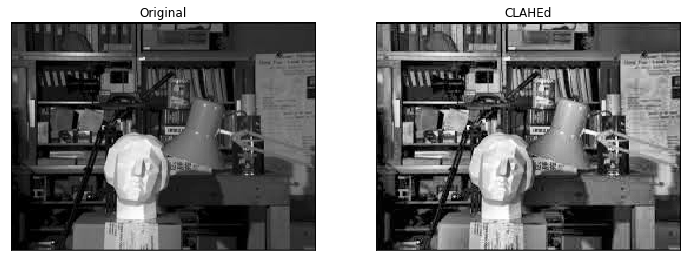

In [11]:
%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('tsukuba_l.jpg',0)

# create a CLAHE object (Arguments are optional).
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)

#cv2.imwrite('clahe_2.jpg',cl1)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1),plt.imshow(img,cmap='gray')
plt.xticks([]),plt.yticks([]),plt.title('Original')
plt.subplot(1,2,2),plt.imshow(cl1,cmap='gray')
plt.xticks([]),plt.yticks([]),plt.title('CLAHEd')

plt.show()

上の結果(特に胸像の領域)と次の結果を比較しよう:

## 補足資料
1. ikipediaの [ヒストグラム平坦化(英語) の記事](http://en.wikipedia.org/wiki/Histogram_equalization)
2. Numpyの[マスクされた配列](http://docs.scipy.org/doc/numpy/reference/maskedarray.html)<BR>
コントラストの調節に関するStackOverflowのページも参照せよ:
3. [どうすればOpenCV(C言語)を使ってコントラストを調節できる?(英語)](http://stackoverflow.com/questions/10549245/how-can-i-adjust-contrast-in-opencv-in-c)
4. [OpenCVを使って画像の明るさやコントラストを均等化する方法を教えて(英語)](http://stackoverflow.com/questions/10561222/how-do-i-equalize-contrast-brightness-of-images-using-opencv)


## 目次
* [最初に戻る]( http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/Notebook/usingOpenCV.html )
* 一つ上: [OpenCVでのヒストグラム](http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/Notebook/histogram.html) 
ヒストグラムについて学ぶ．
* 前の学習項目: [ヒストグラム その1: 計算して，プロットして，解析する !!! histogramStart.ipynb](http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/Notebook/histogramStart.html)<BR>
ヒストグラムの計算及び描画方法 
* 次の学習項目: [ヒストグラム その3: 2次元ヒストグラム histogram2D.ipynb]
    (http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/Notebook/histogram2D.html)<BR>
2次元ヒストグラムの計算及び描画方法